In [18]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import linregress
import numpy as np
import pandas as pd
from prophet import Prophet
import datetime as dt
from IPython.display import display
%matplotlib inline

In [19]:
df = pd.read_csv("./Resources/HR_Analytics.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [21]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [22]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [23]:
AgeGroup = list(df['AgeGroup'].unique())
BusinessTravel = list(df['BusinessTravel'].unique())
Department = list(df['Department'].unique())
EducationField = list(df['EducationField'].unique())
JobRole = list(df['JobRole'].unique())
SalarySlab = list(df['SalarySlab'].unique())


In [24]:
print(f"AgeGroup : {AgeGroup}")
print(f"BusinessTravel : {BusinessTravel}")
print(f"Department : {Department}")
print(f"EducationField : {EducationField}")
print(f"SalarySlab : {SalarySlab}")
print(f"JobRole : {JobRole}")


AgeGroup : ['18-25', '26-35', '36-45', '46-55', '55+']
BusinessTravel : ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel', 'TravelRarely']
Department : ['Research & Development', 'Sales', 'Human Resources']
EducationField : ['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other', 'Human Resources']
SalarySlab : ['Upto 5k', '5k-10k', '10k-15k', '15k+']
JobRole : ['Laboratory Technician', 'Sales Representative', 'Research Scientist', 'Human Resources', 'Manufacturing Director', 'Sales Executive', 'Healthcare Representative', 'Research Director', 'Manager']


In [25]:
for col_name in df.columns:
    if df[col_name].dtype == 'object':
        print(col_name)

EmpID
AgeGroup
Attrition
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
SalarySlab
Over18
OverTime


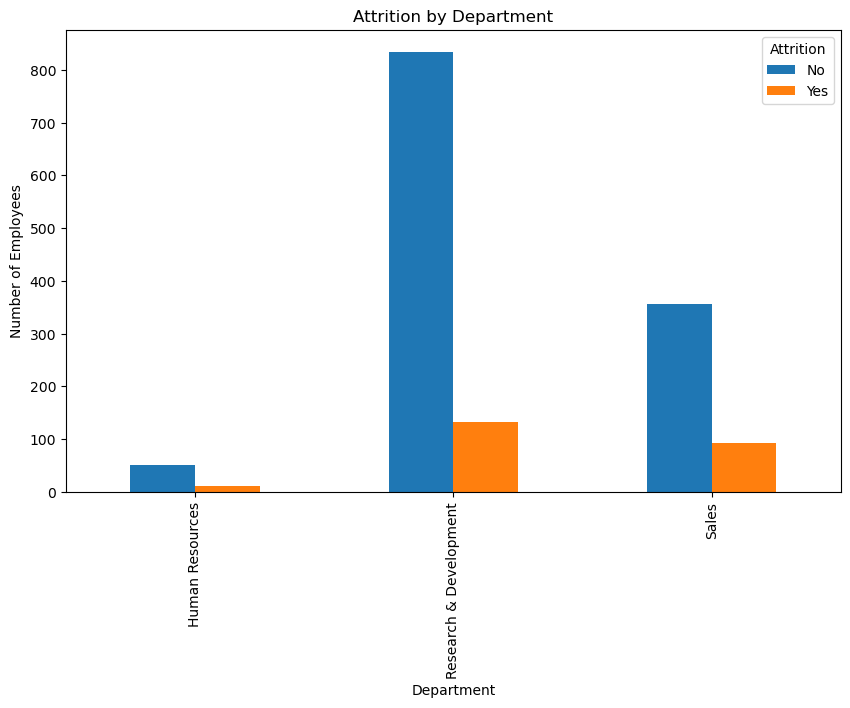

In [26]:
# Group the data by Department and Attrition
dept_attrition = df.groupby(['Department', 'Attrition']).size().unstack()

# Create a bar plot
dept_attrition.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()



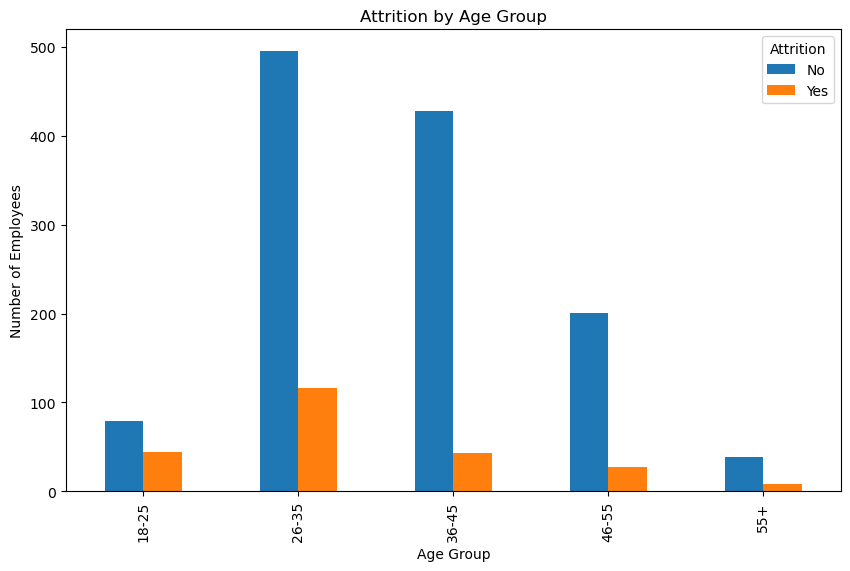

In [27]:
import matplotlib.pyplot as plt

# Group the data by AgeGroup and Attrition
age_attrition = df.groupby(['AgeGroup', 'Attrition']).size().unstack()

# Create a bar plot
age_attrition.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Attrition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()


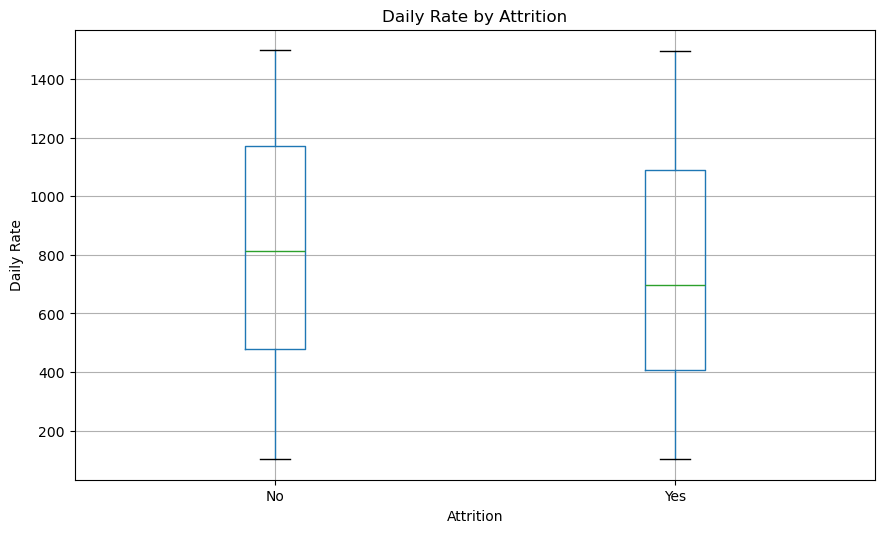

In [28]:
# Create a box plot for DailyRate vs. Attrition
df.boxplot(column='DailyRate', by='Attrition', figsize=(10, 6))
plt.title('Daily Rate by Attrition')
plt.suptitle('')  # Remove the automatic "Boxplot grouped by Attrition" title
plt.xlabel('Attrition')
plt.ylabel('Daily Rate')
plt.show()


In [29]:
# Filter data for relevant columns (age group, department, attrition, etc.)
filtered_data = df[['AgeGroup', 'Department', 'Attrition', 'DailyRate', 'BusinessTravel']]

# You can further sort the filtered data
filtered_sorted_data = filtered_data.sort_values(by=['AgeGroup', 'Department'])
print(filtered_sorted_data.head())  # Display sorted and filtered data

    AgeGroup              Department Attrition  DailyRate     BusinessTravel
12     18-25         Human Resources       Yes        489      Travel_Rarely
93     18-25         Human Resources       Yes        240      Travel_Rarely
95     18-25         Human Resources        No        897  Travel_Frequently
120    18-25         Human Resources        No        309      Travel_Rarely
0      18-25  Research & Development       Yes        230      Travel_Rarely
